In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set()

In [3]:
rng = np.random.RandomState(1)

In [6]:
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)

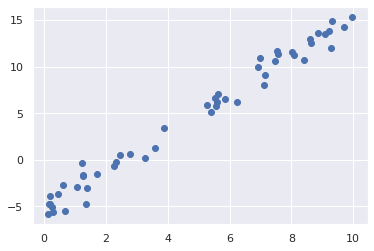

In [7]:
plt.scatter(x, y)
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

LinearRegression()

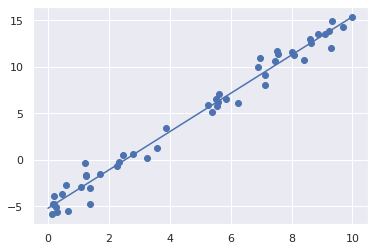

In [11]:
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

In [14]:
model.coef_[0]

2.0578695875006057

In [13]:
model.intercept_

-5.206876274410396

In [15]:
rng = np.random.RandomState(2)

In [16]:
X = 10 * rng.rand(100, 3)
y = 0.5 * np.dot(X, [1.5, -2, 1.])

In [17]:
model.fit(X, y)

LinearRegression()

In [18]:
print(model.intercept_)

-4.440892098500626e-16


In [19]:
print(model.coef_)

[ 0.75 -1.    0.5 ]


In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [22]:
from sklearn.pipeline import make_pipeline

In [23]:
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

In [24]:
rng = np.random.RandomState(1)

In [25]:
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

In [26]:
poly_model.fit(x[:, np.newaxis], y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

In [29]:
yfit = poly_model.predict(xfit[:, np.newaxis])

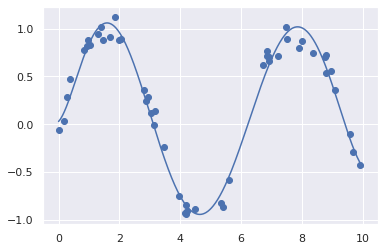

In [30]:
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin

In [32]:
class GaussianFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gaus_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y=None):
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gaus_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

In [33]:
gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())

In [34]:
gauss_model.fit(x[:, np.newaxis], y)

Pipeline(steps=[('gaussianfeatures', GaussianFeatures(N=20)),
                ('linearregression', LinearRegression())])

In [35]:
yfit = gauss_model.predict(xfit[:, np.newaxis])

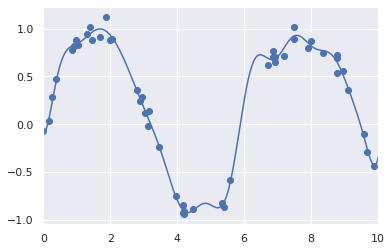

In [36]:
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10)
plt.show()

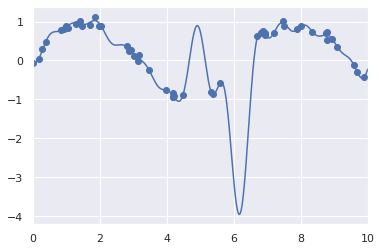

In [38]:
gauss_model = make_pipeline(GaussianFeatures(30), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10)
plt.show()